# PANDAS TUTORIAL (QUICK TOUR-10 MINUTES)

This is a short introduction to `pandas`, geared mainly for new users.

Customarily, we import as follow:

In [1]:
import numpy as np
import pandas as pd

## Object Creation

Creating a **Series** by passing a list of values, letting `pandas` create a default integer index.

In [2]:
s = pd.Series([1, 2, -7, 10, np.nan, 8, 11])
s

0     1.0
1     2.0
2    -7.0
3    10.0
4     NaN
5     8.0
6    11.0
dtype: float64

Creating a **DataFrame** by passing a `NumPy` array, with datetime index and labeled columns.

In [3]:
dates = pd.date_range("20220319", periods=7)
dates

DatetimeIndex(['2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(7, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2022-03-19,-0.106305,-0.225929,1.212985,-0.830349
2022-03-20,0.166670,0.018105,1.306192,-2.318246
2022-03-21,-0.164851,0.334454,0.394945,-0.071904
2022-03-22,0.909042,0.293697,1.415373,-0.478504
2022-03-23,-0.462119,0.834702,0.771864,1.417628
2022-03-24,0.571120,0.691602,0.096770,0.807095
2022-03-25,-0.917260,-1.427368,-1.971813,-2.668932


Create a **DataFrame** by passing a *dictionary* of objects that can be converted into a series-like structure.

In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.5,
        "B": pd.Timestamp("20220319"),
        "C": pd.Series(1, index=list(range(4)), dtype=np.float32),
        "D": np.array([5] * 4, dtype=np.int32),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.5,2022-03-19,1.0,5,test,foo
1,1.5,2022-03-19,1.0,5,train,foo
2,1.5,2022-03-19,1.0,5,test,foo
3,1.5,2022-03-19,1.0,5,train,foo


The columns of the resulting **DataFrame** have different `dtypes`.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

Here is how to view the top and bottom rows of the frame.

In [7]:
df.head()

,A,B,C,D
2022-03-19,-0.106305,-0.225929,1.212985,-0.830349
2022-03-20,0.166670,0.018105,1.306192,-2.318246
2022-03-21,-0.164851,0.334454,0.394945,-0.071904
2022-03-22,0.909042,0.293697,1.415373,-0.478504
2022-03-23,-0.462119,0.834702,0.771864,1.417628


In [8]:
df.tail()

,A,B,C,D
2022-03-21,-0.164851,0.334454,0.394945,-0.071904
2022-03-22,0.909042,0.293697,1.415373,-0.478504
2022-03-23,-0.462119,0.834702,0.771864,1.417628
2022-03-24,0.571120,0.691602,0.096770,0.807095
2022-03-25,-0.917260,-1.427368,-1.971813,-2.668932


> You can pass arguments to the `head()` or `tail()` functions to display a specified number of rows.

In [9]:
df.head(2)

,A,B,C,D
2022-03-19,-0.106305,-0.225929,1.212985,-0.830349
2022-03-20,0.166670,0.018105,1.306192,-2.318246


Display the index, columns.

In [10]:
df.index

DatetimeIndex(['2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

> `DataFrame.to_numpy()` gives a `NumPy` representation of the underlying data. Note that this can be an expensive operation when your `DataFrame` has columns with *different* data types, which comes down to a fundamental difference between pandas and `NumPy`: `NumPy` arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call `DataFrame.to_numpy()`, pandas will find the `NumPy` dtype that can hold all of the dtypes in the `DataFrame`. This may end up being object, which requires casting every value to a Python object.

For `df`, our **DataFrame** of all floating-point values, `DataFrame.to_numpy()` is fast and doesn't require copying data

In [12]:
df.to_numpy()

array([[-0.10630537, -0.22592861,  1.21298485, -0.83034908],
       [ 0.16667   ,  0.01810508,  1.306192  , -2.31824629],
       [-0.16485088,  0.334454  ,  0.3949448 , -0.0719037 ],
       [ 0.90904192,  0.29369673,  1.41537296, -0.47850427],
       [-0.46211937,  0.83470241,  0.77186388,  1.41762768],
       [ 0.57111977,  0.69160236,  0.09677012,  0.80709476],
       [-0.91726004, -1.42736753, -1.97181263, -2.66893208]])

For `df2`, the **DataFrame** with multiply `dtypes`, `DataFrame.to_numpy()` is relative expensive.

In [13]:
df2.to_numpy()

array([[1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'test', 'foo'],
       [1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'train', 'foo'],
       [1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'test', 'foo'],
       [1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'train', 'foo']],
      dtype=object)

`describe()` shows a quick statistic summary of your data.

In [14]:
df.describe()

,A,B,C,D
count,7.000000,7.000000,7.000000,7.000000
mean,-0.000529,0.074181,0.460902,-0.591888
std,0.615590,0.755357,1.179187,1.507196
min,-0.917260,-1.427368,-1.971813,-2.668932
25%,-0.313485,-0.103912,0.245857,-1.574298
50%,-0.106305,0.293697,0.771864,-0.478504
75%,0.368895,0.513028,1.259588,0.367596
max,0.909042,0.834702,1.415373,1.417628


In [15]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.5,1.0,5.0
std,0.0,0.0,0.0
min,1.5,1.0,5.0
25%,1.5,1.0,5.0
50%,1.5,1.0,5.0
75%,1.5,1.0,5.0
max,1.5,1.0,5.0


Transposing your data.

In [16]:
df.T

,2022-03-19,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25
A,-0.106305,0.166670,-0.164851,0.909042,-0.462119,0.571120,-0.917260
B,-0.225929,0.018105,0.334454,0.293697,0.834702,0.691602,-1.427368
C,1.212985,1.306192,0.394945,1.415373,0.771864,0.096770,-1.971813
D,-0.830349,-2.318246,-0.071904,-0.478504,1.417628,0.807095,-2.668932


Sorting by an **axis**

In [17]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2022-03-25,-0.917260,-1.427368,-1.971813,-2.668932
2022-03-24,0.571120,0.691602,0.096770,0.807095
2022-03-23,-0.462119,0.834702,0.771864,1.417628
2022-03-22,0.909042,0.293697,1.415373,-0.478504
2022-03-21,-0.164851,0.334454,0.394945,-0.071904
2022-03-20,0.166670,0.018105,1.306192,-2.318246
2022-03-19,-0.106305,-0.225929,1.212985,-0.830349


In [18]:
df.sort_index(axis=1, ascending=False)


,D,C,B,A
2022-03-19,-0.830349,1.212985,-0.225929,-0.106305
2022-03-20,-2.318246,1.306192,0.018105,0.166670
2022-03-21,-0.071904,0.394945,0.334454,-0.164851
2022-03-22,-0.478504,1.415373,0.293697,0.909042
2022-03-23,1.417628,0.771864,0.834702,-0.462119
2022-03-24,0.807095,0.096770,0.691602,0.571120
2022-03-25,-2.668932,-1.971813,-1.427368,-0.917260


Sorting by values.

In [19]:
df.sort_values(by="B")

,A,B,C,D
2022-03-25,-0.917260,-1.427368,-1.971813,-2.668932
2022-03-19,-0.106305,-0.225929,1.212985,-0.830349
2022-03-20,0.166670,0.018105,1.306192,-2.318246
2022-03-22,0.909042,0.293697,1.415373,-0.478504
2022-03-21,-0.164851,0.334454,0.394945,-0.071904
2022-03-24,0.571120,0.691602,0.096770,0.807095
2022-03-23,-0.462119,0.834702,0.771864,1.417628


## Selection

### Getting

Selecting a single column, which yeild a `Series`, equivalent to `df.A`.

In [20]:
print("df.A", df.A, sep="\n")
print("="*30)
print("df[\"A\"]", df["A"], sep="\n")

df.A
2022-03-19   -0.106305
2022-03-20    0.166670
2022-03-21   -0.164851
2022-03-22    0.909042
2022-03-23   -0.462119
2022-03-24    0.571120
2022-03-25   -0.917260
Freq: D, Name: A, dtype: float64
df["A"]
2022-03-19   -0.106305
2022-03-20    0.166670
2022-03-21   -0.164851
2022-03-22    0.909042
2022-03-23   -0.462119
2022-03-24    0.571120
2022-03-25   -0.917260
Freq: D, Name: A, dtype: float64


Selecting via `[]`, which slicing the rows.

In [21]:
df[0:3]

,A,B,C,D
2022-03-19,-0.106305,-0.225929,1.212985,-0.830349
2022-03-20,0.166670,0.018105,1.306192,-2.318246
2022-03-21,-0.164851,0.334454,0.394945,-0.071904


In [22]:
df["20220319":"20220321"]

,A,B,C,D
2022-03-19,-0.106305,-0.225929,1.212985,-0.830349
2022-03-20,0.166670,0.018105,1.306192,-2.318246
2022-03-21,-0.164851,0.334454,0.394945,-0.071904


## Selection by label

For getting a cross section using a label.

In [23]:
df.loc[dates[0]]

A   -0.106305
B   -0.225929
C    1.212985
D   -0.830349
Name: 2022-03-19 00:00:00, dtype: float64

Selecting on a multi-axis by label.

In [24]:
df.loc[:, ["A", "B"]]

,A,B
2022-03-19,-0.106305,-0.225929
2022-03-20,0.166670,0.018105
2022-03-21,-0.164851,0.334454
2022-03-22,0.909042,0.293697
2022-03-23,-0.462119,0.834702
2022-03-24,0.571120,0.691602
2022-03-25,-0.917260,-1.427368


Showing label slicing, both endpoints are included.

In [25]:
df.loc["20220319":"20220321", ["C", "D"]]

,C,D
2022-03-19,1.212985,-0.830349
2022-03-20,1.306192,-2.318246
2022-03-21,0.394945,-0.071904


Reduction in the dimensions of returned object.

In [26]:
df.loc["20220324", ["B", "C"]]

B    0.691602
C    0.096770
Name: 2022-03-24 00:00:00, dtype: float64

For getting a scalar value.

In [27]:
df.loc[dates[1], "A"]

0.16666999930041573

For getting fast access to a scalar (equivalent to the prior method).

In [28]:
df.at[dates[1], "A"]

0.16666999930041573

## Selection by position

Select via the position of the passed integers.

In [29]:
df.iloc[3]
# equivalent to df.loc[dates[3]]

A    0.909042
B    0.293697
C    1.415373
D   -0.478504
Name: 2022-03-22 00:00:00, dtype: float64

By integer slices, acting similar to `Numpy/Python`.

In [30]:
df.iloc[3:5, 0:2]
# equivalent to df.loc["20220322":"20220323", ["A", "B"]]

,A,B
2022-03-22,0.909042,0.293697
2022-03-23,-0.462119,0.834702


By list of integer position locations, similar to the `Numpy/Python` style.

In [31]:
df.iloc[[1, 2, 4], [0, 2]]
# equivalent to df.loc["20220320":"20220323", ["B", "C"]]

,A,C
2022-03-20,0.166670,1.306192
2022-03-21,-0.164851,0.394945
2022-03-23,-0.462119,0.771864


For slicing rows explicitly.

In [32]:
df.iloc[1:3, :]

,A,B,C,D
2022-03-20,0.166670,0.018105,1.306192,-2.318246
2022-03-21,-0.164851,0.334454,0.394945,-0.071904


For slicing columns explicitly.

In [33]:
df.iloc[:, 1:3]

,B,C
2022-03-19,-0.225929,1.212985
2022-03-20,0.018105,1.306192
2022-03-21,0.334454,0.394945
2022-03-22,0.293697,1.415373
2022-03-23,0.834702,0.771864
2022-03-24,0.691602,0.096770
2022-03-25,-1.427368,-1.971813


For getting a value explicitly.

In [34]:
df.iloc[1, 1]

0.018105075282602776

For getting fast access to a scalar (equivalent to the prior method).

In [35]:
df.iat[1, 1]

0.018105075282602776

## Boolean indexing

Using a single column's values to select data.

In [36]:
df[df["A"] > 0]

,A,B,C,D
2022-03-20,0.166670,0.018105,1.306192,-2.318246
2022-03-22,0.909042,0.293697,1.415373,-0.478504
2022-03-24,0.571120,0.691602,0.096770,0.807095


Selecting values from a **DataFrame** where a boolean condition is met.

In [37]:
df[df > 0]

,A,B,C,D
2022-03-19,NaN,NaN,1.212985,NaN
2022-03-20,0.166670,0.018105,1.306192,NaN
2022-03-21,NaN,0.334454,0.394945,NaN
2022-03-22,0.909042,0.293697,1.415373,NaN
2022-03-23,NaN,0.834702,0.771864,1.417628
2022-03-24,0.571120,0.691602,0.096770,0.807095
2022-03-25,NaN,NaN,NaN,NaN


Using `isin()` method for filtering.

In [38]:
df_copy = df.copy()
df_copy["E"] = ["one", "two", "three", "four", "five", "six", "seven"]
df_copy

,A,B,C,D,E
2022-03-19,-0.106305,-0.225929,1.212985,-0.830349,one
2022-03-20,0.166670,0.018105,1.306192,-2.318246,two
2022-03-21,-0.164851,0.334454,0.394945,-0.071904,three
2022-03-22,0.909042,0.293697,1.415373,-0.478504,four
2022-03-23,-0.462119,0.834702,0.771864,1.417628,five
2022-03-24,0.571120,0.691602,0.096770,0.807095,six
2022-03-25,-0.917260,-1.427368,-1.971813,-2.668932,seven


In [39]:
df_copy[df_copy["E"].isin(["three", "six"])]

,A,B,C,D,E
2022-03-21,-0.164851,0.334454,0.394945,-0.071904,three
2022-03-24,0.571120,0.691602,0.096770,0.807095,six


## Setting

Setting a new column automatically aligns the data by the indexes.

In [40]:
s1 = pd.Series(list(range(1, 8)), index=pd.date_range("20220319", periods=7))
s1

2022-03-19    1
2022-03-20    2
2022-03-21    3
2022-03-22    4
2022-03-23    5
2022-03-24    6
2022-03-25    7
Freq: D, dtype: int64

In [41]:
df["F"] = s1
df

,A,B,C,D,F
2022-03-19,-0.106305,-0.225929,1.212985,-0.830349,1
2022-03-20,0.166670,0.018105,1.306192,-2.318246,2
2022-03-21,-0.164851,0.334454,0.394945,-0.071904,3
2022-03-22,0.909042,0.293697,1.415373,-0.478504,4
2022-03-23,-0.462119,0.834702,0.771864,1.417628,5
2022-03-24,0.571120,0.691602,0.096770,0.807095,6
2022-03-25,-0.917260,-1.427368,-1.971813,-2.668932,7


Setting values by label.

In [42]:
df.at[dates[0], "A"] = 0
df

,A,B,C,D,F
2022-03-19,0.000000,-0.225929,1.212985,-0.830349,1
2022-03-20,0.166670,0.018105,1.306192,-2.318246,2
2022-03-21,-0.164851,0.334454,0.394945,-0.071904,3
2022-03-22,0.909042,0.293697,1.415373,-0.478504,4
2022-03-23,-0.462119,0.834702,0.771864,1.417628,5
2022-03-24,0.571120,0.691602,0.096770,0.807095,6
2022-03-25,-0.917260,-1.427368,-1.971813,-2.668932,7


Setting values by position.

In [43]:
df.iat[0, 1] = 1
df

,A,B,C,D,F
2022-03-19,0.000000,1.000000,1.212985,-0.830349,1
2022-03-20,0.166670,0.018105,1.306192,-2.318246,2
2022-03-21,-0.164851,0.334454,0.394945,-0.071904,3
2022-03-22,0.909042,0.293697,1.415373,-0.478504,4
2022-03-23,-0.462119,0.834702,0.771864,1.417628,5
2022-03-24,0.571120,0.691602,0.096770,0.807095,6
2022-03-25,-0.917260,-1.427368,-1.971813,-2.668932,7


Setting by assigning with a `Numpy` array

In [44]:
df.loc[:, "D"] = np.array(5 * len(df))
df

,A,B,C,D,F
2022-03-19,0.000000,1.000000,1.212985,35,1
2022-03-20,0.166670,0.018105,1.306192,35,2
2022-03-21,-0.164851,0.334454,0.394945,35,3
2022-03-22,0.909042,0.293697,1.415373,35,4
2022-03-23,-0.462119,0.834702,0.771864,35,5
2022-03-24,0.571120,0.691602,0.096770,35,6
2022-03-25,-0.917260,-1.427368,-1.971813,35,7


## Missing data

`Pandas` primarily uses the value `np.nan` to represent missing data. It is by default not included in computation.

Reindexing allows you to change/add/delete the index on a sepecified axis. This returns a copy of data.

In [45]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0]:dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2022-03-19,0.000000,1.000000,1.212985,35,1,1.0
2022-03-20,0.166670,0.018105,1.306192,35,2,1.0
2022-03-21,-0.164851,0.334454,0.394945,35,3,NaN
2022-03-22,0.909042,0.293697,1.415373,35,4,NaN


To drop any rows that have missing data.

In [46]:
df1.dropna(how="any")

,A,B,C,D,F,E
2022-03-19,0.00000,1.000000,1.212985,35,1,1.0
2022-03-20,0.16667,0.018105,1.306192,35,2,1.0


Filling missing data.

In [47]:
df1.fillna(value=3)

,A,B,C,D,F,E
2022-03-19,0.000000,1.000000,1.212985,35,1,1.0
2022-03-20,0.166670,0.018105,1.306192,35,2,1.0
2022-03-21,-0.164851,0.334454,0.394945,35,3,3.0
2022-03-22,0.909042,0.293697,1.415373,35,4,3.0


To get the boolean mask where values are `nan`.

In [48]:
pd.isna(df1)

,A,B,C,D,F,E
2022-03-19,False,False,False,False,False,False
2022-03-20,False,False,False,False,False,False
2022-03-21,False,False,False,False,False,True
2022-03-22,False,False,False,False,False,True


## Operations

### Stats

Operations in general *exclude* missing data.

Perform a descriptive statistic.

In [49]:
df.mean()

A     0.014657
B     0.249313
C     0.460902
D    35.000000
F     4.000000
dtype: float64

Same operation on the other axis.

In [50]:
df.mean(1)

2022-03-19    7.642597
2022-03-20    7.698193
2022-03-21    7.712910
2022-03-22    8.323622
2022-03-23    8.228889
2022-03-24    8.471898
2022-03-25    7.536712
Freq: D, dtype: float64

Operation with objects that have different dismensionality and need alignment. In addition, `pandas` automatically broadcast along the specified dimension.

In [51]:
s = pd.Series([1, 3, 5, np.nan, 6, 8, 11], index=dates).shift(2)
s

2022-03-19    NaN
2022-03-20    NaN
2022-03-21    1.0
2022-03-22    3.0
2022-03-23    5.0
2022-03-24    NaN
2022-03-25    6.0
Freq: D, dtype: float64

In [52]:
df.sub(s, axis="index")

,A,B,C,D,F
2022-03-19,NaN,NaN,NaN,NaN,NaN
2022-03-20,NaN,NaN,NaN,NaN,NaN
2022-03-21,-1.164851,-0.665546,-0.605055,34.0,2.0
2022-03-22,-2.090958,-2.706303,-1.584627,32.0,1.0
2022-03-23,-5.462119,-4.165298,-4.228136,30.0,0.0
2022-03-24,NaN,NaN,NaN,NaN,NaN
2022-03-25,-6.917260,-7.427368,-7.971813,29.0,1.0


### Apply

Applying functions to the data.

In [53]:
df

,A,B,C,D,F
2022-03-19,0.000000,1.000000,1.212985,35,1
2022-03-20,0.166670,0.018105,1.306192,35,2
2022-03-21,-0.164851,0.334454,0.394945,35,3
2022-03-22,0.909042,0.293697,1.415373,35,4
2022-03-23,-0.462119,0.834702,0.771864,35,5
2022-03-24,0.571120,0.691602,0.096770,35,6
2022-03-25,-0.917260,-1.427368,-1.971813,35,7


In [54]:
df.apply(np.cumsum)
# equivalent to df.apply(np.cumsum, axis=0)

,A,B,C,D,F
2022-03-19,0.000000,1.000000,1.212985,35,1
2022-03-20,0.166670,1.018105,2.519177,70,3
2022-03-21,0.001819,1.352559,2.914122,105,6
2022-03-22,0.910861,1.646256,4.329495,140,10
2022-03-23,0.448742,2.480958,5.101358,175,15
2022-03-24,1.019861,3.172561,5.198129,210,21
2022-03-25,0.102601,1.745193,3.226316,245,28


In [55]:
df.apply(np.cumsum, axis=1)

,A,B,C,D,F
2022-03-19,0.000000,1.000000,2.212985,37.212985,38.212985
2022-03-20,0.166670,0.184775,1.490967,36.490967,38.490967
2022-03-21,-0.164851,0.169603,0.564548,35.564548,38.564548
2022-03-22,0.909042,1.202739,2.618112,37.618112,41.618112
2022-03-23,-0.462119,0.372583,1.144447,36.144447,41.144447
2022-03-24,0.571120,1.262722,1.359492,36.359492,42.359492
2022-03-25,-0.917260,-2.344628,-4.316440,30.683560,37.683560


In [56]:
df.apply(lambda x: x.max() - x.min())

A    1.826302
B    2.427368
C    3.387186
D    0.000000
F    6.000000
dtype: float64

In [57]:
df.apply(lambda x: x.max() - x.min(), axis=1)

2022-03-19    35.000000
2022-03-20    34.981895
2022-03-21    35.164851
2022-03-22    34.706303
2022-03-23    35.462119
2022-03-24    34.903230
2022-03-25    36.971813
Freq: D, dtype: float64

### Histogramming

In [58]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    6
1    0
2    6
3    3
4    5
5    6
6    4
7    3
8    0
9    5
dtype: int32

In [59]:
s.value_counts()

6    3
0    2
3    2
5    2
4    1
dtype: int64

### String methods

Series is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses **regular expressions** by default (and in some cases always uses them).

In [60]:
s = pd.Series(["A", "B", "C", "D", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s

0       A
1       B
2       C
3       D
4    Aaba
5    Baca
6     NaN
7    CABA
8     dog
9     cat
dtype: object

In [61]:
s.str.lower()

0       a
1       b
2       c
3       d
4    aaba
5    baca
6     NaN
7    caba
8     dog
9     cat
dtype: object

### Merge

#### Concat

`Pandas` provides various facilities for easily combining together `Series` and `DataFrame` objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join/merge-type operations.

Concatenating pandas objects together with `concat()`.

In [62]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.005405,-1.219622,-0.324920,-1.542373
1,0.707285,-1.314311,-1.020257,-0.642121
2,-0.739310,0.581724,0.709825,-0.072327
3,-0.343974,0.713255,-0.021921,-0.412159
4,0.455144,-0.138739,0.453036,0.841025
5,0.651861,0.884675,0.373022,-0.772498
6,-0.777220,-1.667503,-0.743999,0.375028
7,-1.079072,-1.296217,0.483860,-1.100075
8,0.966096,-0.929094,0.830425,0.028266
9,2.651731,0.364438,-0.354155,0.664226


In [63]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.005405 -1.219622 -0.324920 -1.542373
 1  0.707285 -1.314311 -1.020257 -0.642121
 2 -0.739310  0.581724  0.709825 -0.072327,
           0         1         2         3
 3 -0.343974  0.713255 -0.021921 -0.412159
 4  0.455144 -0.138739  0.453036  0.841025
 5  0.651861  0.884675  0.373022 -0.772498
 6 -0.777220 -1.667503 -0.743999  0.375028,
           0         1         2         3
 7 -1.079072 -1.296217  0.483860 -1.100075
 8  0.966096 -0.929094  0.830425  0.028266
 9  2.651731  0.364438 -0.354155  0.664226]

In [64]:
pd.concat(pieces)

,0,1,2,3
0,-0.005405,-1.219622,-0.324920,-1.542373
1,0.707285,-1.314311,-1.020257,-0.642121
2,-0.739310,0.581724,0.709825,-0.072327
3,-0.343974,0.713255,-0.021921,-0.412159
4,0.455144,-0.138739,0.453036,0.841025
5,0.651861,0.884675,0.373022,-0.772498
6,-0.777220,-1.667503,-0.743999,0.375028
7,-1.079072,-1.296217,0.483860,-1.100075
8,0.966096,-0.929094,0.830425,0.028266
9,2.651731,0.364438,-0.354155,0.664226


> Adding a column to a `DataFrame` is relatively fast. However, adding a row requires a copy, and may be expensive. I recommend passing a pre-built list of records to the `DataFrame` constructor instead of building a `DataFrame` by iteratively appending records to it.

### Join

SQL style merges.

In [65]:
left = pd.DataFrame(
    {
        "keys": ["foo", "bar"],
        "lval": [1, 2]
    }
)
right = pd.DataFrame(
    {
        "keys": ["foo", "bar"],
        "rval": [4, 5]
    }
)

In [66]:
left

,keys,lval
0,foo,1
1,bar,2


In [67]:
right

,keys,rval
0,foo,4
1,bar,5


In [68]:
pd.merge(left, right, on="keys")

,keys,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By "grouping" we are refering to a process involving one ore more of the following steps:

- **Splitting** the data into groups based on some criteria.
- **Applying** a function to each group independently
- **Combining** the results into a data structure

In [69]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-2.009680,0.189306
1,bar,one,-0.235263,-1.464321
2,foo,two,-0.683885,0.572836
3,bar,three,0.402889,0.559370
4,foo,two,0.680063,-0.781188
5,bar,two,-0.049599,-0.725908
6,foo,one,0.107169,-0.750656
7,foo,three,-0.331890,-0.345118


Grouping and then applying the `sum()` function to the resulting group.

In [70]:
df.groupby("A").sum()

,C,D
A,,
bar,0.118026,-1.630859
foo,-2.238222,-1.114820


Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum()` function.

In [71]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.235263 -1.464321
    three  0.402889  0.559370
    two   -0.049599 -0.725908
foo one   -1.902510 -0.561350
    three -0.331890 -0.345118
    two   -0.003822 -0.208352

## Reshaping

### Stack

In [72]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -0.162413  1.840469
      two     0.050449 -0.079239
baz   one     2.097976 -0.305909
      two    -0.502096  2.123931
foo   one    -0.933949  0.387143
      two    -0.814975 -2.012575
qux   one    -0.791945  1.002989
      two    -2.013058  0.413136

The `stack()` method "compress" a level in the **DataFrame's** columns.

In [73]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.162413  1.840469
      two     0.050449 -0.079239
baz   one     2.097976 -0.305909
      two    -0.502096  2.123931

In [74]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.162413
               B    1.840469
       two     A    0.050449
               B   -0.079239
baz    one     A    2.097976
               B   -0.305909
       two     A   -0.502096
               B    2.123931
dtype: float64

With a "stacked" DataFrame or Series (having a `MultiIndex` as the `Index`), the inverse operation of `stack()` is `unstack()`, which by default unstacks the **last level**.

In [75]:
stacked.unstack()

A         B
first second                    
bar   one    -0.162413  1.840469
      two     0.050449 -0.079239
baz   one     2.097976 -0.305909
      two    -0.502096  2.123931

In [76]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.162413  0.050449
      B  1.840469 -0.079239
baz   A  2.097976 -0.502096
      B -0.305909  2.123931

In [77]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.162413  2.097976
       B  1.840469 -0.305909
two    A  0.050449 -0.502096
       B -0.079239  2.123931

## Pivot tables

In [78]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

df

,A,B,C,D,E
0,one,A,foo,0.212229,2.549430
1,one,B,foo,0.170113,0.111898
2,two,C,foo,0.279296,0.063428
3,three,A,bar,-3.011022,0.029331
4,one,B,bar,0.030451,-2.043143
5,one,C,bar,0.692882,0.835739
6,two,A,foo,1.529280,1.083328
7,three,B,foo,-0.577509,-1.512533
8,one,C,foo,1.954520,-0.696462
9,one,A,bar,-0.351219,-1.580545


We can produce pivot tables from this data very easily.

In [79]:
pd.pivot_table(df, values="D", index=["A", "B"], columns="C")

C             bar       foo
A     B                    
one   A -0.351219  0.212229
      B  0.030451  0.170113
      C  0.692882  1.954520
three A -3.011022       NaN
      B       NaN -0.577509
      C -0.997016       NaN
two   A       NaN  1.529280
      B  0.873879       NaN
      C       NaN  0.279296

## Time series

`Pandas` has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

In [80]:
rng = pd.date_range("1/1/2022", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2022-01-01 00:00:00     92
2022-01-01 00:00:01    150
2022-01-01 00:00:02    289
2022-01-01 00:00:03    328
2022-01-01 00:00:04    308
                      ... 
2022-01-01 00:01:35    247
2022-01-01 00:01:36    230
2022-01-01 00:01:37    380
2022-01-01 00:01:38    223
2022-01-01 00:01:39    365
Freq: S, Length: 100, dtype: int32

In [81]:
ts.resample("5Min").sum()

2022-01-01    24934
Freq: 5T, dtype: int32

Time zone representation

In [82]:
rng = pd.date_range("1/1/2022 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2022-01-01    0.052057
2022-01-02   -0.205427
2022-01-03   -2.028190
2022-01-04   -0.180416
2022-01-05   -0.314939
Freq: D, dtype: float64

In [83]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2022-01-01 00:00:00+00:00    0.052057
2022-01-02 00:00:00+00:00   -0.205427
2022-01-03 00:00:00+00:00   -2.028190
2022-01-04 00:00:00+00:00   -0.180416
2022-01-05 00:00:00+00:00   -0.314939
Freq: D, dtype: float64

Converting to another time zone.

In [84]:
ts_utc.tz_convert("US/Eastern")

2021-12-31 19:00:00-05:00    0.052057
2022-01-01 19:00:00-05:00   -0.205427
2022-01-02 19:00:00-05:00   -2.028190
2022-01-03 19:00:00-05:00   -0.180416
2022-01-04 19:00:00-05:00   -0.314939
Freq: D, dtype: float64

Converting between time span representations.

In [85]:
rng = pd.date_range("1/1/2022", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2022-01-31   -0.980549
2022-02-28   -0.229938
2022-03-31   -0.471051
2022-04-30    0.998910
2022-05-31   -1.047684
Freq: M, dtype: float64

In [86]:
ps = ts.to_period()
ps

2022-01   -0.980549
2022-02   -0.229938
2022-03   -0.471051
2022-04    0.998910
2022-05   -1.047684
Freq: M, dtype: float64

In [87]:
ps.to_timestamp()

2022-01-01   -0.980549
2022-02-01   -0.229938
2022-03-01   -0.471051
2022-04-01    0.998910
2022-05-01   -1.047684
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenients arithmetic functions to be used. In the following example, I convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end.

In [88]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00    1.553652
1990-06-01 09:00   -1.499048
1990-09-01 09:00    1.109655
1990-12-01 09:00    0.526259
1991-03-01 09:00   -0.712425
Freq: H, dtype: float64

## Categoricals

`Pandas` can include categorical data in a **DataFrame**.

In [89]:
df = pd.DataFrame(
    {
        "id": list(range(1, 7, 1)),
        "raw_grade": ["a", "a", "b", "a", "a", "e"],
    }
)

Converting the grades to a categorical data type.

In [90]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    a
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to `Series.cat.categories()` is in place!).

In [91]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1    very good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

Reorder the categories and simultaneously add the missing categories (methods under `Series.cat()` return a new `Series` by default).

In [92]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1    very good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting in per order in the categories, not lexical order.

In [93]:
df.sort_values(by="grade", ascending=False)

,id,raw_grade,grade
0,1,a,very good
1,2,a,very good
3,4,a,very good
4,5,a,very good
2,3,b,good
5,6,e,very bad


Grouping by a categorical column also shows empty categories.

In [94]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         1
very good    4
dtype: int64

## Plotting

We use the standard convention for referencing the matplotlib API.

In [95]:
import matplotlib.pyplot as plt
plt.close("all")

The `close()` method is used to close a figure window.

<AxesSubplot:>

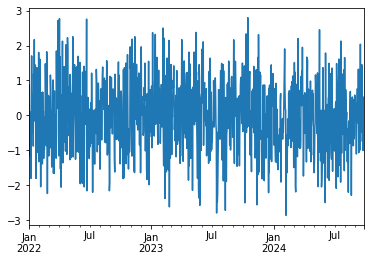

In [96]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2022", periods=1000))
ts.plot()

<AxesSubplot:>

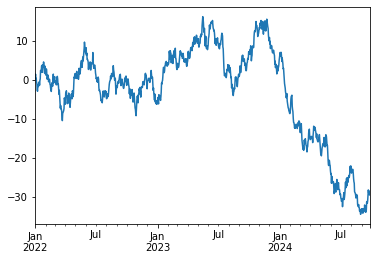

In [97]:
ts_cumsum = ts.cumsum()
ts_cumsum.plot()

If running under Jupyter Notebook, the plot will appear on `plot()`. Otherwise use `matplotlib.pyplot.show` to show it of `matplotlin.pyplot.savefig` to write it into a file.

In [98]:
plt.show()

On a DataFrame, the `plot()` method is a convenience to plot all of the columns with labels.

<Figure size 432x288 with 0 Axes>

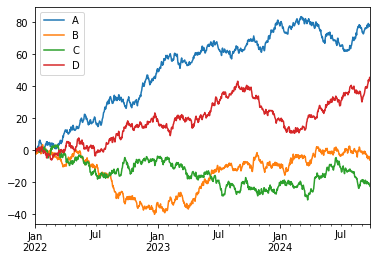

In [99]:
df = pd.DataFrame(
    np.random.randn(1000, 4),
    index=ts.index,
    columns=list("ABCD")
)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc="best")

## Getting data in/out

### CSV

#### Writing to a .csv file

In [100]:
df.to_csv("./docs/files/foo.csv")

#### Reading from a .csv file

In [101]:
pd.read_csv("./docs/files/foo.csv")

,Unnamed: 0,A,B,C,D
0,2022-01-01,-0.980016,0.213739,1.167508,0.884177
1,2022-01-02,-0.489597,-0.045589,0.284940,0.211927
2,2022-01-03,0.239032,-1.124373,0.592802,-1.023273
3,2022-01-04,0.893307,-2.301067,1.110100,0.766275
4,2022-01-05,0.656998,-0.938600,0.955967,0.917341
...,...,...,...,...,...
995,2024-09-22,78.572104,-3.958174,-20.186044,43.119195
996,2024-09-23,78.686707,-3.692136,-21.083223,43.582875
997,2024-09-24,78.525645,-5.203383,-21.479417,44.363208
998,2024-09-25,77.605792,-6.035984,-21.577242,45.742783


### HDF5

Reading and writing to HDF5Stores.

#### Writing to a HDF5 Store.

In [104]:
df.to_hdf("./docs/files/foo.h5", "df")

#### Reading from HDF5 Store.

In [105]:
pd.read_hdf("./docs/files/foo.h5", "df")

,A,B,C,D
2022-01-01,-0.980016,0.213739,1.167508,0.884177
2022-01-02,-0.489597,-0.045589,0.284940,0.211927
2022-01-03,0.239032,-1.124373,0.592802,-1.023273
2022-01-04,0.893307,-2.301067,1.110100,0.766275
2022-01-05,0.656998,-0.938600,0.955967,0.917341
...,...,...,...,...
2024-09-22,78.572104,-3.958174,-20.186044,43.119195
2024-09-23,78.686707,-3.692136,-21.083223,43.582875
2024-09-24,78.525645,-5.203383,-21.479417,44.363208
2024-09-25,77.605792,-6.035984,-21.577242,45.742783


### Excel

Reading and writing to MS Excel.

#### Writing to an excel file

In [108]:
df.to_excel("./docs/files/foo.xlsx", sheet_name="Sheet1")

#### Reading from an excel file.

In [109]:
pd.read_excel("./docs/files/foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2022-01-01,-0.980016,0.213739,1.167508,0.884177
1,2022-01-02,-0.489597,-0.045589,0.284940,0.211927
2,2022-01-03,0.239032,-1.124373,0.592802,-1.023273
3,2022-01-04,0.893307,-2.301067,1.110100,0.766275
4,2022-01-05,0.656998,-0.938600,0.955967,0.917341
...,...,...,...,...,...
995,2024-09-22,78.572104,-3.958174,-20.186044,43.119195
996,2024-09-23,78.686707,-3.692136,-21.083223,43.582875
997,2024-09-24,78.525645,-5.203383,-21.479417,44.363208
998,2024-09-25,77.605792,-6.035984,-21.577242,45.742783
